# SNA Implementation


### 201621464_윤재건

### 마블 히어로 관계 데이터를 통해 인싸 아이언맨의 중심성을 분석하고 숨겨진 인싸는 누구일지 알아보자

마블 히어로 연결 데이터는 캐글("https://www.kaggle.com/csanhueza/the-marvel-universe-social-network")에서 구하였다.    
- hero-network.csv: (hero1,hero2) 두 개의 컬럼으로 구성, 어떤 히어로들이 코믹에 같이   출현했는지 나타냄 (서로 다른 여러 만화에서 출현한 경우 중복되어 표기되었는데,   하나의 노드로 표현하기 위해서 전체 52만개의 로우에서 중복된 **30만 개의 로우를 중복제거**하였다.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import networkx as nx
# %matplotlib inline # 시각화 자료를 바로 확인할 수 있게 해줌

In [2]:
hero_df= pd.read_csv("hero-network.csv") # 연결망 데이터

In [3]:
len(hero_df)

224181

In [12]:
graph1= nx.Graph()
graph1= nx.nx.from_pandas_edgelist(hero_df,source="hero1",target="hero2")
print(nx.info(graph1))

Name: 
Type: Graph
Number of nodes: 6426
Number of edges: 167219
Average degree:  52.0445


### 중심성

#### 연결정도 중심성(아는 노드가 많은 정도)

In [13]:
degree_cen= nx.degree_centrality(graph1)
#degree_cen은 dictionary이기 때문에 값(중심성)을 기준으로 내림차순 정렬하려면 lambda식이 필요하다
sorted(degree_cen.items(),key= lambda x:x[1],reverse=True)[0:5]

[('CAPTAIN AMERICA', 0.2969649805447471),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254)]

#### 근접 중심성( 중심과 가까워 신속한 전파가 가능한 정도)


In [14]:
clos_cen = nx.closeness_centrality(graph1)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('CAPTAIN AMERICA', 0.583688144346388),
 ('SPIDER-MAN/PETER PAR', 0.5740902532137266),
 ('IRON MAN/TONY STARK ', 0.5614279813721937),
 ('THING/BENJAMIN J. GR', 0.5577521106953788),
 ('MR. FANTASTIC/REED R', 0.556053126894305)]

#### 아이겐벡터 중심성(중심성이 높은 친구들을 많이 아는 정도)

In [15]:
eigen_cen=nx.eigenvector_centrality(graph1)
sorted(eigen_cen.items(), key= lambda x:x[1], reverse=True)[0:5]

[('CAPTAIN AMERICA', 0.11677469223625939),
 ('IRON MAN/TONY STARK ', 0.10254077322184336),
 ('SCARLET WITCH/WANDA ', 0.10082113046617165),
 ('THING/BENJAMIN J. GR', 0.10078249100850409),
 ('SPIDER-MAN/PETER PAR', 0.1002321495868602)]

아이언맨은 역시 모든 중심성에서 top3에 등극했다.    
하지만 1등은 연결정도/근접/아이겐벡터 중심성에서 모두 1등을 한   
**캡틴 아메리카**이다

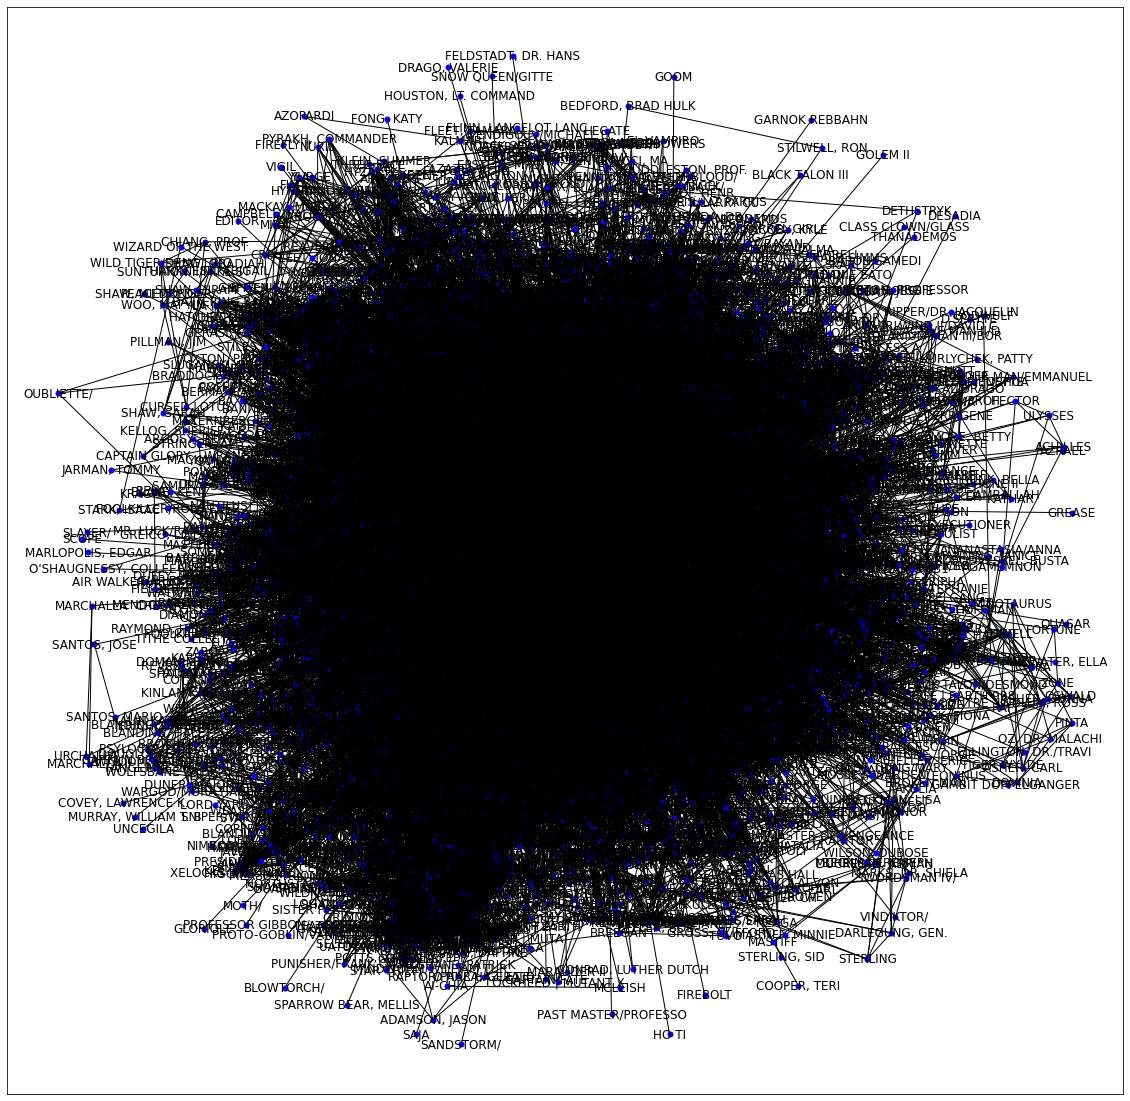

In [16]:
# spring_layout의 네트워크 그래프는 아래와 같은 형태를 갖는다.
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(graph1, k = 0.15)
nx.draw_networkx(graph1,pos, node_size = 25, node_color = 'blue')
plt.show() 